<text>
    <h1 style="text-align:center"> <a href="https://archive.ics.uci.edu/ml/datasets/Bank+Marketing">  Bank Marketing project  </a>  </h1>
    <br>
    <h3>Documentation: </h3>
    <ul> 
        <li> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">  MinMaxScaler  </a>  </li>   
        <li> <a href="https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html">  Distance Metrics  </a>  </li> 
        <li> <a href="https://www.w3schools.com/python/pandas/default.asp">  Pandas </a>  </li> 
        
</text>

<text>For this project we will try to determine the accuracy of a trained machine in giving bank loans depending on the input datas.<br>
For the input data we will drop the we will select the entities/inputs where the data is not "unkown".<br>
Some categories(columns) contain too many "unknowns"(example: contact) or containing irrelevant information, so they had to be dropped.<br>
Some entities(rows) were missing mandatory information (a good example being the job) and they had to be dropped.<br>
At the end of the data filtering we will try to train our machine to give loans accordin to age, job, marital status, education,default, balance, housing and active loans.<br>
The main algorithm used is knn(k-nearest neighbors algorithm) method alongside distance metrics: Minkowski Distance and Manhattan Distance , in order to obtain different result and more accurate one.<br>
The results will be desplayed in labels and are easy to interpret.</text>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import mean_absolute_error as mae 
from sklearn.metrics         import mean_squared_error  as mse
from sklearn.neighbors       import KNeighborsClassifier as knn
from sklearn.linear_model    import LinearRegression, Ridge

In [3]:
def visualConfMatrix (real, predicted, title):
    labels = [0,1]
    conf_matrix = pd.DataFrame(confusion_matrix (real, predicted), 
                        index   = labels,
                        columns = labels)
    plt.figure(figsize = (8,5))
    plt.title(title + ' Confusion Matrix')
    sn.heatmap(conf_matrix, annot=True, fmt='g')
    plt.plot()

def interpret (model, x_train, y_train, x_test, y_test, label = None, fit=True, PrintConfMatrix=False):
    # this function helps us to interpret the performances of the model by showing the matrics and the ConfMatrix  

    if fit:
        try: model.fit(x_train, y_train)
        except: pass

    if label: print (label + ' Interpretation:')

    predicted_train = model.predict(x_train)
    predicted_test  = model.predict(x_test)

    print(f'Train Score: {model.score(x_train, y_train) :.3f}') 
    print(f'Train mae:   {mae(predicted_train, y_train) :.3f}')
    print(f'Train mse:   {mse(predicted_train, y_train) :.3f}')

    print()

    print(f'Test  Score: {model.score(x_test, y_test) :.3f}') 
    print(f'Test  mae:   {mae(predicted_test, y_test) :.3f}')
    print(f'Test  mse:   {mse(predicted_test, y_test) :.3f}')

    print()

    predicted_train = np.round(predicted_train)
    predicted_test  = np.round(predicted_test) 

    print(f'The train performance:  {np.average(predicted_train == y_train)*100 :.3f} %')
    print(f'The test  performance:  {np.average(predicted_test  == y_test )*100 :.3f} %')
    print()

    if PrintConfMatrix:
        visualConfMatrix(predicted_train, y_train, 'Train')
        visualConfMatrix(predicted_test,  y_test,  'Test')

<h3>
    Preprocesing
</h3>
<text>
     In the following sequences we are dropping the irrelevant information, preventing the missclasification. 
     <br>
     Following the previous action , we will normalise the data in order to favorise the clasification.
</text>

In [18]:
dataset = pd.read_csv('data/bank-full.csv', sep=';') \
        .drop(columns=['contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']) \
        .replace(to_replace='unknown', value=pd.NA).dropna()
display(dataset.head(10))


keys = dataset['job'].value_counts().keys()
jobs = dict(zip(keys, list(range(len(keys)))))
dataset['job'] = dataset['job'].apply(lambda x: jobs[x])

keys = dataset['marital'].value_counts().keys()
maritals = dict(zip(keys, list(range(len(keys)))))
dataset['marital'] = dataset['marital'].apply(lambda x: maritals[x])

keys = dataset['education'].value_counts().keys()
educations = dict(zip(keys, list(range(len(keys)))))
dataset['education'] = dataset['education'].apply(lambda x: educations[x])

yesno = {'no':0, 'yes':1}
dataset['default'] = dataset['default'].apply(lambda x: yesno[x])
dataset['housing'] = dataset['housing'].apply(lambda x: yesno[x])
dataset['loan'] = dataset['loan'].apply(lambda x: yesno[x])
dataset['y'] = dataset['y'].apply(lambda x: yesno[x])
scaler = MinMaxScaler()
scaler.fit(dataset)
scaledData = scaler.transform(dataset)
dataset = pd.DataFrame(scaledData, columns=dataset.columns)

display(dataset.head(10))
display(dataset.describe())

,age,job,marital,education,default,balance,housing,loan,y
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
5,35,management,married,tertiary,no,231,yes,no,no
6,28,management,single,tertiary,no,447,yes,yes,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,no
8,58,retired,married,primary,no,121,yes,no,no
9,43,technician,single,secondary,no,593,yes,no,no
10,41,admin.,divorced,secondary,no,270,yes,no,no
11,29,admin.,single,secondary,no,390,yes,no,no


,age,job,marital,education,default,balance,housing,loan,y
0,0.519481,0.1,0.0,0.5,0.0,0.092259,1.0,0.0,0.0
1,0.337662,0.2,0.5,0.0,0.0,0.073067,1.0,0.0,0.0
2,0.194805,0.7,0.0,0.0,0.0,0.072822,1.0,1.0,0.0
3,0.220779,0.1,0.0,0.5,0.0,0.074901,1.0,0.0,0.0
4,0.129870,0.1,0.5,0.5,0.0,0.076862,1.0,1.0,0.0
5,0.311688,0.7,1.0,0.5,1.0,0.072822,1.0,0.0,0.0
6,0.519481,0.5,0.0,1.0,0.0,0.073902,1.0,0.0,0.0
7,0.324675,0.2,0.5,0.0,0.0,0.078187,1.0,0.0,0.0
8,0.298701,0.3,1.0,0.0,0.0,0.075255,1.0,0.0,0.0
9,0.142857,0.3,0.5,0.0,0.0,0.076344,1.0,0.0,0.0


,age,job,marital,education,default,balance,housing,loan,y
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,0.295637,0.262730,0.257854,0.310953,0.018105,0.085096,0.562406,0.164541,0.116246
std,0.136528,0.256236,0.347340,0.370816,0.133332,0.027619,0.496096,0.370770,0.320523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.100000,0.000000,0.000000,0.000000,0.073448,0.000000,0.000000,0.000000
50%,0.272727,0.200000,0.000000,0.000000,0.000000,0.076816,1.000000,0.000000,0.000000
75%,0.389610,0.400000,0.500000,0.500000,0.000000,0.085623,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4>
    DataSet
</h4>
<text>
    We are spliting the data into input and output.
</text>

In [5]:
train, test = train_test_split(dataset, test_size=0.2)
y_train = train['y'].to_numpy().astype(np.int)
y_test = test['y'].to_numpy().astype(np.int)
x_train = train.drop(columns=['y']).to_numpy()
x_test = test.drop(columns=['y']).to_numpy()

<text>
    Here we obtained the firs model using Minkowshki metric distance. <br>
    After interpreting the firs set of results we decided to make the yes and no cases even( 0 - not allowed to be given loans and 1 - allowed to be given a loan)
</text>

Train Score: 0.894
Train mae:   0.106
Train mse:   0.106

Test  Score: 0.879
Test  mae:   0.121
Test  mse:   0.121

The train performance:  89.440 %
The test  performance:  87.904 %



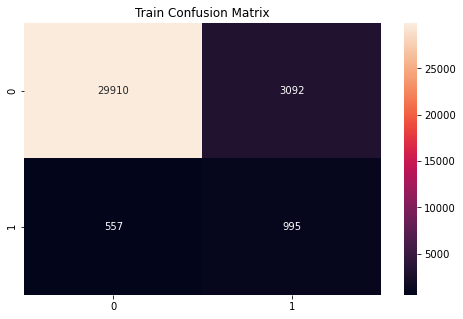

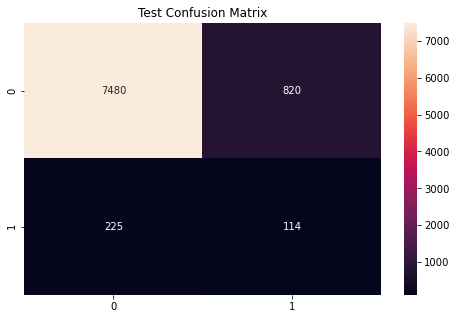

In [6]:
interpret(knn(metric='minkowski'), x_train, y_train, x_test, y_test, PrintConfMatrix=True)

<text>
        In the following sequences, we are making the data to be even.
</text>

In [7]:
index = np.where(dataset['y'].to_numpy() == 0)[0][sum(dataset['y'] == 1):]
dataset.drop(index, inplace=True)

In [8]:
train, test = train_test_split(dataset, test_size=0.2)
y_train = train['y'].to_numpy().astype(np.int)
y_test = test['y'].to_numpy().astype(np.int)
x_train = train.drop(columns=['y']).to_numpy()
x_test = test.drop(columns=['y']).to_numpy()

<h4>
    Interpretation using Minkowski Distance metric.
</h4>

Train Score: 0.807
Train mae:   0.193
Train mse:   0.193

Test  Score: 0.745
Test  mae:   0.255
Test  mse:   0.255

The train performance:  80.667 %
The test  performance:  74.515 %



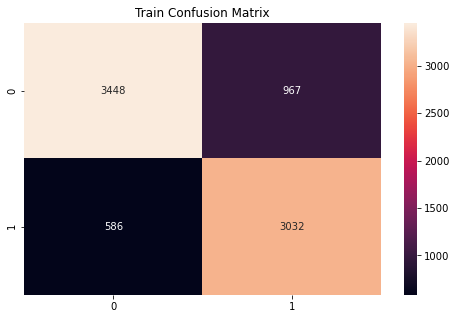

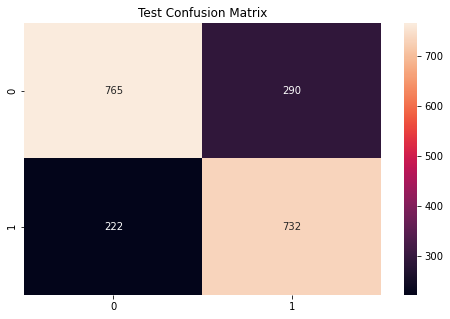

In [9]:
interpret(knn(metric='minkowski'), x_train, y_train, x_test, y_test, PrintConfMatrix=True)

<h4>
    Interpretation using Manhattan Distance metric.
</h4>

Train Score: 0.807
Train mae:   0.193
Train mse:   0.193

Test  Score: 0.748
Test  mae:   0.252
Test  mse:   0.252

The train performance:  80.717 %
The test  performance:  74.764 %



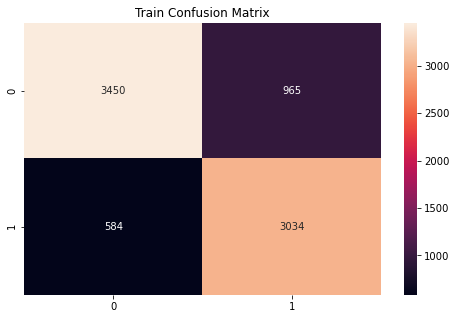

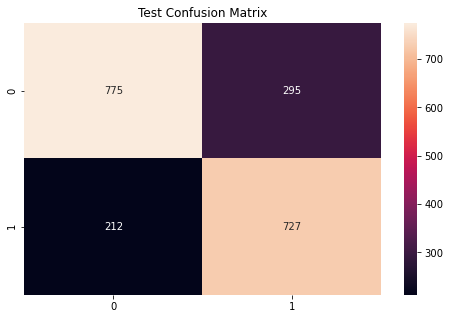

In [10]:
interpret(knn(metric='manhattan'), x_train, y_train, x_test, y_test, PrintConfMatrix=True)